In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
df = pd.read_csv('mutagenicity_kNN (1).csv')
print(df.head()) ;

   Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
2           2   3  100-02-7    O=[N+]([O-])c1ccc(O)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
4           4   5  100-12-9   O=[N+]([O-])c1ccc(cc1)CC  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
2                   0               1                   52  0.470728  63.37   
3                   1               0                   58  0.432586  43.14   
4                   0               0                   58  0.479785  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088

In [38]:
print("Missing values in each column:\n",df.isnull().sum()) ; 

Missing values in each column:
 Unnamed: 0             0
Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64


In [39]:
print(df.columns)

Index(['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Experimental value',
       'Predicted value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')


In [40]:
print(df['Status'].unique())  
print(df['Experimental value'].unique())  
print(df['Predicted value'].unique())  

['Training']
[1 0]
['1' '0' 'Non Predicted']


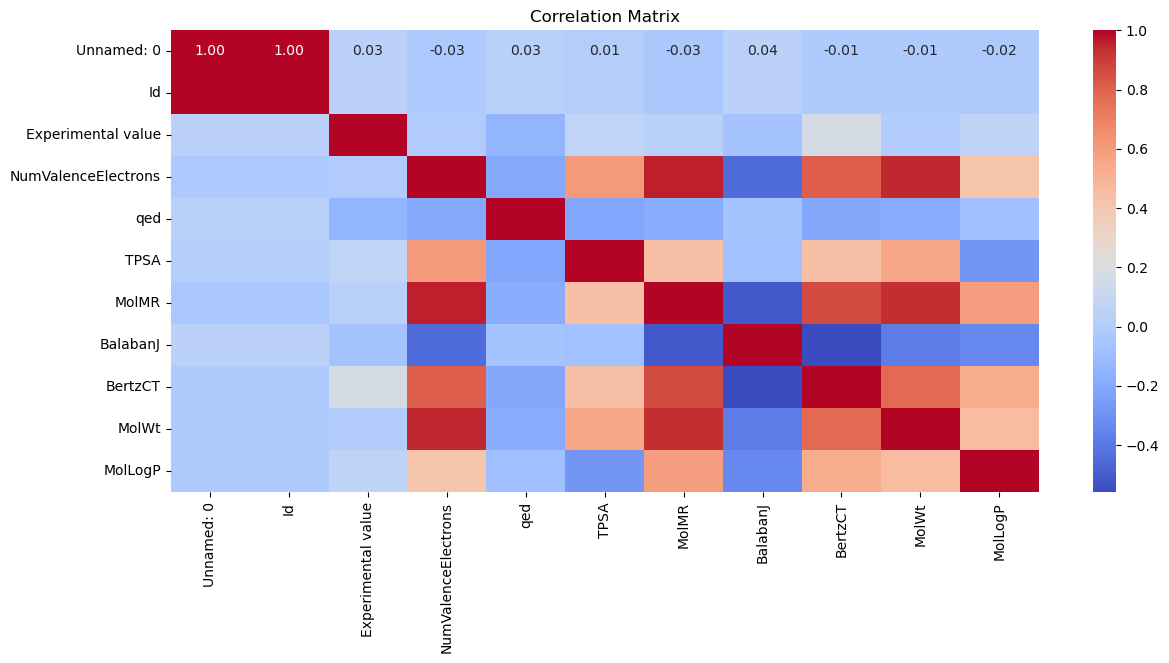

In [41]:
numeric_df = df.select_dtypes(include=[np.number]);
corr_matrix = numeric_df.corr() ; 
plt.figure(figsize=(14,6)) ;
sns.heatmap(corr_matrix,annot=True, fmt=".2f",cmap="coolwarm") ; 
plt.title("Correlation Matrix") ; 
plt.show() ; 

In [24]:
X = df.drop(columns=['Experimental value', 'Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Predicted value'])
y = df['Experimental value']

#Since "Experimental value" already contains 1 (mutagenic) and 0 (non-mutagenic)

In [25]:
X.fillna(X.mean(), inplace=True)

In [26]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#KNN with Hyperparameter Tuning
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
#Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k: {best_k}')

Best k: 17


In [27]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

#Metrics
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'F1-score: {f1}\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')

F1-score: 0.7397881996974282
Accuracy: 0.7016478751084129
Precision: 0.7276785714285714
Recall: 0.7523076923076923
Confusion Matrix:
[[320 183]
 [161 489]]


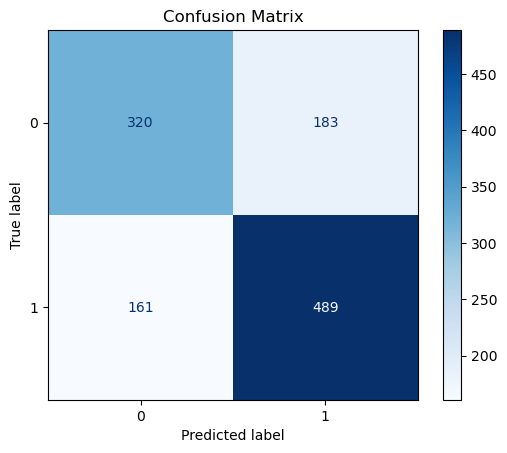


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       503
           1       0.73      0.75      0.74       650

    accuracy                           0.70      1153
   macro avg       0.70      0.69      0.70      1153
weighted avg       0.70      0.70      0.70      1153



In [42]:
#Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap='Blues') ;
plt.title("Confusion Matrix") ; 
plt.show() ;

#Classification report
print("\nClassification Report:") ; 
print(classification_report(y_test, y_pred)) ; 

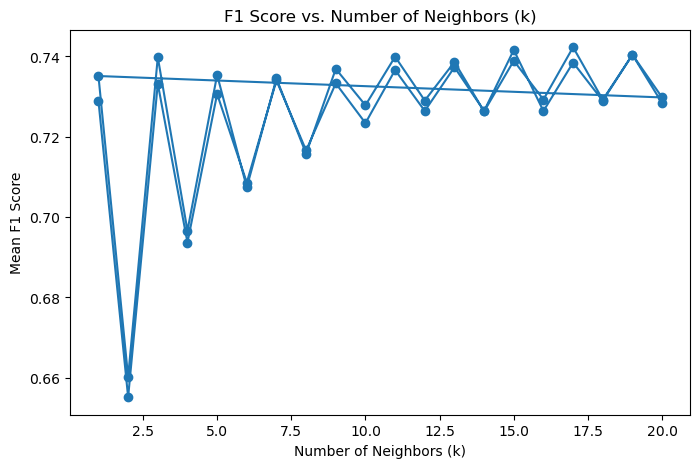

In [43]:
#Extracting k values and corresponding F1 scores from GridSearchCV results
results = grid_search.cv_results_

#Plot of  k vs. F1-score
plt.figure(figsize=(8, 5))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean F1 Score")
plt.title("F1 Score vs. Number of Neighbors (k)")
plt.show()